In [20]:
import geopandas as gp
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt

In [21]:
df = gp.read_file("taxi_zones.shp")
df.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


In [22]:
queens        = (df[df['borough']=='Queens'])
staten_island = (df[df['borough']=='Staten Island'])
bronx         = (df[df['borough']=='Bronx'])
manhattan     = (df[df['borough']=='Manhattan'])
brooklyn      = (df[df['borough']=='Brooklyn'])

In [24]:
conn = sqlite3.connect('taxi_dbs.db')
c = conn.cursor()

# poor connectivity
c.execute("select DOLocationID from taxi_Details where Store_and_fwd_flag='Y'")

result = list(dict.fromkeys(c))
result.sort()

#locations where connectivity is poor = results

print(len(result))
print(len(df))

172
263


Wall time: 1.25 s


Text(0.5, 1, 'Regions of NYC with poor connection')

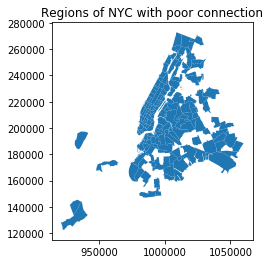

In [27]:
%%time

l = []
min_df = df['LocationID']
for i in range(len(result)):
    for j in range(len(min_df)):
        if result[i][0] == min_df[j]:
            l.append(j)
df.iloc[l].plot()           
plt.title("Regions of NYC with poor connection")